In [1]:
import pandas as pd
new_file = pd.read_excel('NewPost.xlsx')

In [2]:
new_file.columns

Index(['Export Category', 'Export Value(USD Million)', 'Year'], dtype='object')

In [3]:
#Resetting data by reversing the index from latest to oldest first 
new_file = new_file[::-1].reset_index(drop=True)

<Axes: xlabel='Year', ylabel='Export Value(USD Million)'>

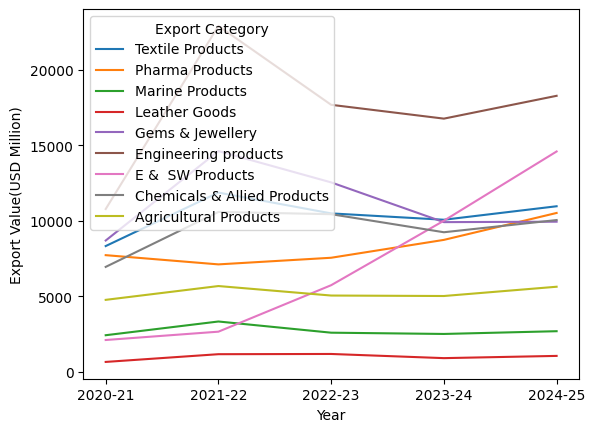

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=new_file, x="Year", y="Export Value(USD Million)", hue="Export Category")


In [5]:
df_pivot = new_file.pivot(index='Export Category', columns='Year', values='Export Value(USD Million)')
df_yoy = df_pivot.pct_change(axis=1) * 100
df_yoy = df_yoy.round(2)


In [6]:
df_yoy_long = df_yoy.reset_index().melt(id_vars='Export Category', var_name='Year', value_name='YoY Growth (%)')
df_yoy_long


,Export Category,Year,YoY Growth (%)
0,Agricultural Products,2020-21,NaN
1,Chemicals & Allied Products,2020-21,NaN
2,E & SW Products,2020-21,NaN
3,Engineering products,2020-21,NaN
4,Gems & Jewellery,2020-21,NaN
5,Leather Goods,2020-21,NaN
6,Marine Products,2020-21,NaN
7,Pharma Products,2020-21,NaN
8,Textile Products,2020-21,NaN
9,Agricultural Products,2021-22,19.23


In [7]:
df_yoy_long.columns

Index(['Export Category', 'Year', 'YoY Growth (%)'], dtype='object')

In [8]:
df_yoy_long.dropna(subset=['YoY Growth (%)'], inplace=True)

In [9]:
df_yoy_long

,Export Category,Year,YoY Growth (%)
9,Agricultural Products,2021-22,19.23
10,Chemicals & Allied Products,2021-22,52.45
11,E & SW Products,2021-22,26.31
12,Engineering products,2021-22,112.56
13,Gems & Jewellery,2021-22,68.19
14,Leather Goods,2021-22,79.26
15,Marine Products,2021-22,37.64
16,Pharma Products,2021-22,-7.92
17,Textile Products,2021-22,42.57
18,Agricultural Products,2022-23,-11.09


In [10]:
avg_yoyGrowth = df_yoy_long.groupby('Export Category').agg(Avg_yearly_growth= ('YoY Growth (%)', 'mean'))

In [11]:
avg_yoyGrowth

,Avg_yearly_growth
Export Category,
Agricultural Products,4.9450
Chemicals & Allied Products,12.0775
E & SW Products,65.7350
Engineering products,23.3975
Gems & Jewellery,8.3225
Leather Goods,18.3825
Marine Products,4.8450
Pharma Products,8.5950
Textile Products,8.9550


In [12]:
avg1=avg_yoyGrowth.reset_index()

In [13]:
print(avg1)

               Export Category  Avg_yearly_growth
0        Agricultural Products             4.9450
1  Chemicals & Allied Products            12.0775
2             E &  SW Products            65.7350
3         Engineering products            23.3975
4             Gems & Jewellery             8.3225
5                Leather Goods            18.3825
6              Marine Products             4.8450
7              Pharma Products             8.5950
8             Textile Products             8.9550


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Agricultural Products'),
  Text(1, 0, 'Chemicals & Allied Products'),
  Text(2, 0, 'E &  SW Products'),
  Text(3, 0, 'Engineering products'),
  Text(4, 0, 'Gems & Jewellery'),
  Text(5, 0, 'Leather Goods'),
  Text(6, 0, 'Marine Products'),
  Text(7, 0, 'Pharma Products'),
  Text(8, 0, 'Textile Products')])

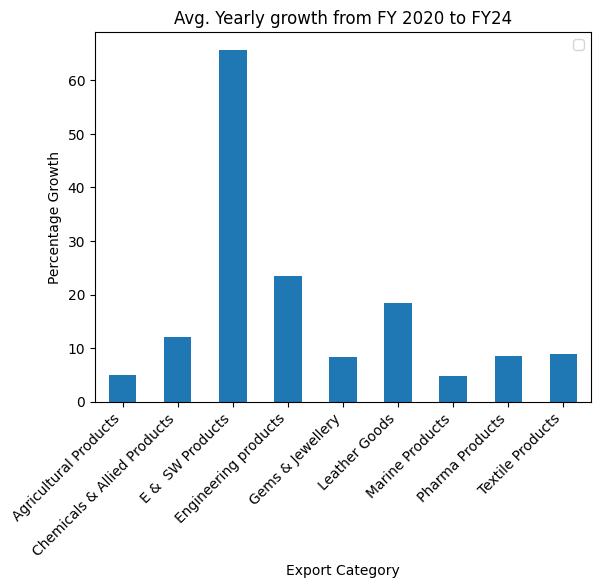

In [26]:
avg1.plot.bar(x='Export Category', y='Avg_yearly_growth', title='Avg. Yearly growth from FY 2020 to FY24')
plt.ylabel("Percentage Growth")
plt.legend('')
plt.xticks(rotation=45, ha='right')


In [15]:
avg_yoyGrowth.to_csv('Avg Growth per sector.csv')

In [16]:
df_yoy_long.to_excel('YearonYear Growth.xlsx', index=False)

In [17]:
df_yoy_long.to_csv('YearonYear Growth.csv', index=False)

<Axes: xlabel='Year', ylabel='YoY Growth (%)'>

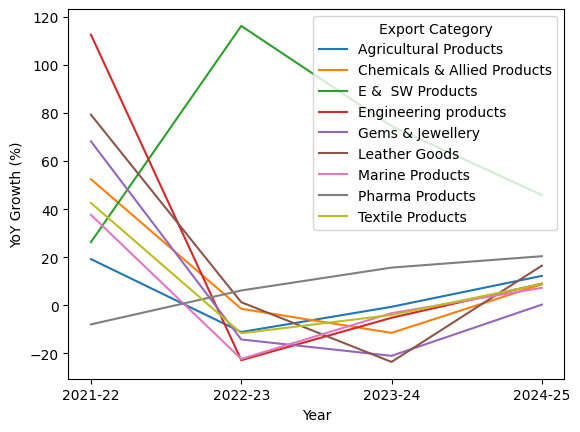

In [18]:
sns.lineplot(data=df_yoy_long,y='YoY Growth (%)', x='Year', hue='Export Category')

In [19]:
new_file.Year.dtype

dtype('O')

In [20]:
new_file['Year'] =new_file['Year'].str.split('-').str[0].astype(int)

This code performs the following actions:

* str.split('-') divides the string at the hyphen, creating a list (e.g., ['2024', '25']).

* str[0] selects the first element of that list (e.g., '2024').

* .astype(int) converts the resulting string to an integer.

In [21]:
# 1) Baseline forecast for 2025 (no tariff variable used)
# new_file has columns: Year, Export Category, Export Value
#(USD Million)

import pandas as pd
from xgboost import XGBRegressor


new_file['year_index'] = new_file['Year'] - new_file['Year'].min()
X = pd.get_dummies(new_file[['year_index','Export Category']], drop_first=True)
y = new_file['Export Value(USD Million)']

model = XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.05, subsample=0.9, colsample_bytree=0.9, random_state=42)
model.fit(X, y)

# Build 2025 design matrix
cats = new_file['Export Category'].unique()
X_2025 = pd.DataFrame({'year_index':[new_file['year_index'].max()+1]*len(cats), 'Export Category':cats})
X_2025 = pd.get_dummies(X_2025, columns=['Export Category'], drop_first=True)
X_2025 = X_2025.reindex(columns=X.columns, fill_value=0)

baseline_2025 = model.predict(X_2025)  # NO-TARIFF forecast
baseline = pd.DataFrame({'Export Category': cats, 'Pred_2025_No_Tariff': baseline_2025})

# 2) Apply tariff shock (50% tariff, 100% pass-through, category elasticities)
tariff_rate = 0.50        # 50%
pass_through = 1.00       # buyer sees full 50% increase

# Example elasticities (tune these!):
elasticity = {
    'Pharma Products': -0.3,
    'Engineering products': -1.2,
    'E & SW Products': -0.8,
    'Gems & Jewellery': -1.0,
    'Textile Products': -1.1,
    'Chemicals & Allied Products': -0.9,
    'Marine Products': -0.7,
    'Leather Goods': -1.0,
    'Agricultural Products': -0.4
}

def adj_with_tariff(row):
    e = elasticity.get(row['Export Category'], -1.0)
    qty_change = e * (tariff_rate * pass_through)   # e.g., -1.2 * 0.5 = -0.6 (−60% volume)
    return row['Pred_2025_No_Tariff'] * (1 + qty_change)

baseline['Pred_2025_With_Tariff'] = baseline.apply(adj_with_tariff, axis=1)
baseline['Estimated_Tariff_Impact ($M)'] = baseline['Pred_2025_No_Tariff'] - baseline['Pred_2025_With_Tariff']
baseline.sort_values('Estimated_Tariff_Impact ($M)', ascending=False, inplace=True)
print(baseline)


               Export Category  Pred_2025_No_Tariff  Pred_2025_With_Tariff  \
5         Engineering products         18107.056641            7242.822656   
6             E &  SW Products         13975.843750            6987.921875   
0             Textile Products         10812.179688            4865.480859   
4             Gems & Jewellery          9851.880859            4925.940430   
7  Chemicals & Allied Products          9884.312500            5436.371875   
1              Pharma Products         10219.907227            8686.921143   
8        Agricultural Products          6970.097656            5576.078125   
2              Marine Products          2579.612061            1676.747839   
3                Leather Goods           957.272339             478.636169   

   Estimated_Tariff_Impact ($M)  
5                  10864.233984  
6                   6987.921875  
0                   5946.698828  
4                   4925.940430  
7                   4447.940625  
1              

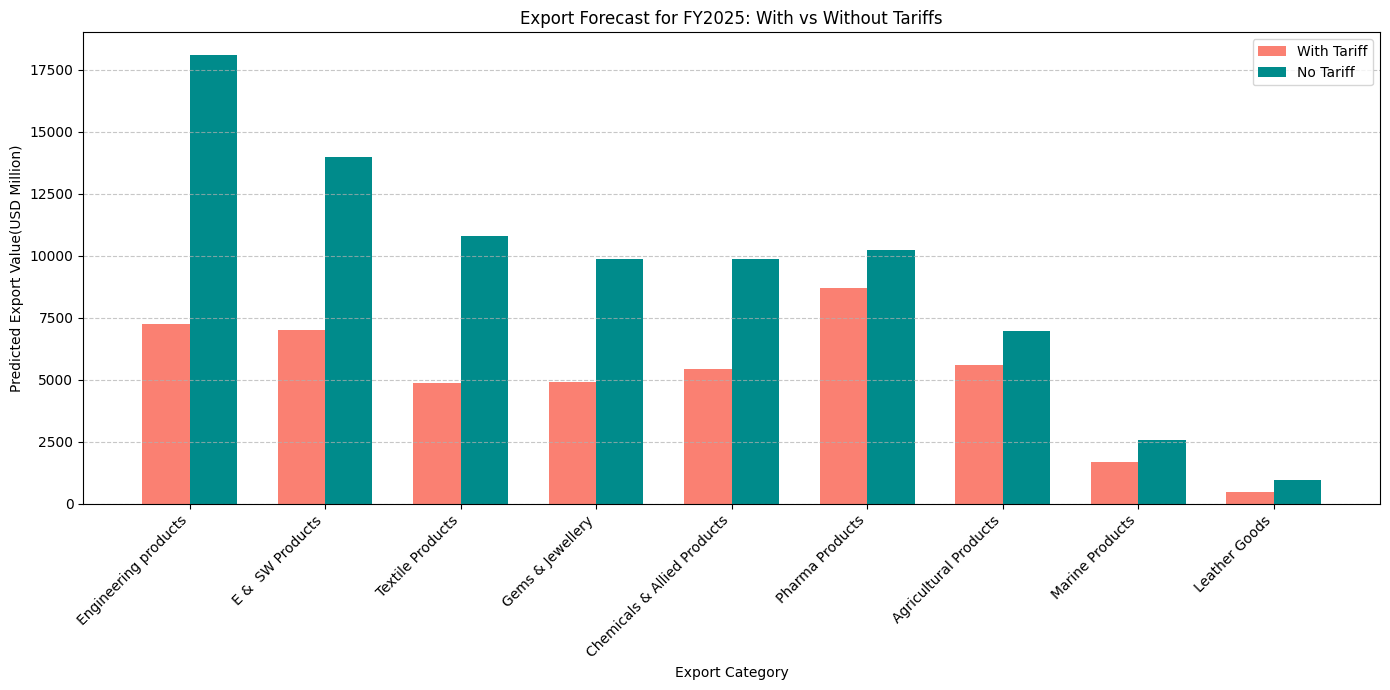

In [22]:
# Plotting
categories = baseline['Export Category']
with_tariff = baseline['Pred_2025_With_Tariff']
no_tariff = baseline['Pred_2025_No_Tariff']

plt.figure(figsize=(14, 7))
bar_width = 0.35
index = range(len(categories))

plt.bar(index, with_tariff, bar_width, label='With Tariff', color='salmon')
plt.bar([i + bar_width for i in index], no_tariff, bar_width, label='No Tariff', color='darkcyan')

plt.xlabel('Export Category')
plt.ylabel('Predicted Export Value(USD Million)')
plt.title('Export Forecast for FY2025: With vs Without Tariffs')
plt.xticks([i + bar_width / 2 for i in index], categories, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)



In [23]:
# --- Setup ---
import pandas as pd
from xgboost import XGBRegressor
import numpy as np



# Baseline model: XGBoost (no tariff feature—clean trend + category effects)
new_file = new_file.sort_values(['Export Category','Year'])
new_file['year_index'] = new_file['Year'] - new_file['Year'].min()
X = pd.get_dummies(new_file[['year_index','Export Category']], drop_first=True)
y = new_file['Export Value(USD Million)']

model = XGBRegressor(
    n_estimators=400, max_depth=4, learning_rate=0.05,
    subsample=0.9, colsample_bytree=0.9, random_state=42
)
model.fit(X, y)

# Baseline 2025 prediction for Textile Products
target = 'Textile Products'
X_2025 = pd.DataFrame({'year_index':[new_file['year_index'].max()+1], 'Export Category':[target]})
X_2025 = pd.get_dummies(X_2025, columns=['Export Category'], drop_first=True)
X_2025 = X_2025.reindex(columns=X.columns, fill_value=0)
baseline_2025 = float(model.predict(X_2025))

print(f"Baseline 2025 (No Tariff) for {target}: ${baseline_2025:,.0f}M")

# Tariff shock + absorption levers (SCENARIOS)
# Elasticity for textiles (tune/range-test): 
E = -1.1

def project_with_levers(
    baseline, 
    tariff_rate=0.50,
    absorb=0.20,                 # 20% absorbed in margin
    rebate_rate=0.07,            # RoSCTL mid-point ~7% for apparel/made-ups
    cost_savings_total=0.21,     # vendor(0.04)+logistics(0.10)+forecasting(0.07) example
    pass_to_price=0.50,          # pass half of those savings to the buyer
    demand_uplift=0.12,          # loyalty+bundling+marketing+customization uplift ~12%
    elasticity=E
):
    net_tariff_to_price = tariff_rate * (1 - absorb)
    effective_price_change = net_tariff_to_price - rebate_rate - pass_to_price*cost_savings_total
    qty_change = elasticity * effective_price_change
    value = baseline * (1 + qty_change) * (1 + demand_uplift)
    return {
        'net_tariff_to_price': net_tariff_to_price,
        'effective_price_change': effective_price_change,
        'qty_change_pct': qty_change,
        'value_2025_with_levers': value
    }

# Tariff-only (100% pass-through, no levers) for reference
value_tariff_only = baseline_2025 * (1 + E * 0.50)  # absorb=0, no rebates, no cost pass, no demand uplift

# Three scenarios based on your playbook
scenarios = {
    'Conservative': dict(absorb=0.10, rebate_rate=0.06, cost_savings_total=0.12, pass_to_price=0.40, demand_uplift=0.05),
    'Base Case'   : dict(absorb=0.20, rebate_rate=0.07, cost_savings_total=0.21, pass_to_price=0.50, demand_uplift=0.12),
    'Aggressive'  : dict(absorb=0.30, rebate_rate=0.082, cost_savings_total=0.28, pass_to_price=0.60, demand_uplift=0.20)
}

rows = []
for name, params in scenarios.items():
    out = project_with_levers(baseline_2025, **params, elasticity=E)
    rows.append({
        'Scenario': name,
        'Baseline_2025_NoTariff ($M)': round(baseline_2025,2),
        'TariffOnly_2025 ($M)': round(value_tariff_only,2),
        'With_Levers_2025 ($M)': round(out['value_2025_with_levers'],2),
        'Absorbed_vs_TariffOnly ($M)': round(out['value_2025_with_levers'] - value_tariff_only,2),
        'Net_Price_Change_%': round(out['effective_price_change']*100,2),
        'Quantity_Change_%': round(out['qty_change_pct']*100,2)
    })

result = pd.DataFrame(rows)
print(result)


Baseline 2025 (No Tariff) for Textile Products: $6,671M
       Scenario  Baseline_2025_NoTariff ($M)  TariffOnly_2025 ($M)  \
0  Conservative                      6671.42               3002.14   
1     Base Case                      6671.42               3002.14   
2    Aggressive                      6671.42               3002.14   

   With_Levers_2025 ($M)  Absorbed_vs_TariffOnly ($M)  Net_Price_Change_%  \
0                4369.72                      1367.58                34.2   
1                5622.68                      2620.54                22.5   
2                7125.08                      4122.94                10.0   

   Quantity_Change_%  
0             -37.62  
1             -24.75  
2             -11.00  


C:\Users\YOG\AppData\Local\Temp\ipykernel_27440\2093173112.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  baseline_2025 = float(model.predict(X_2025))


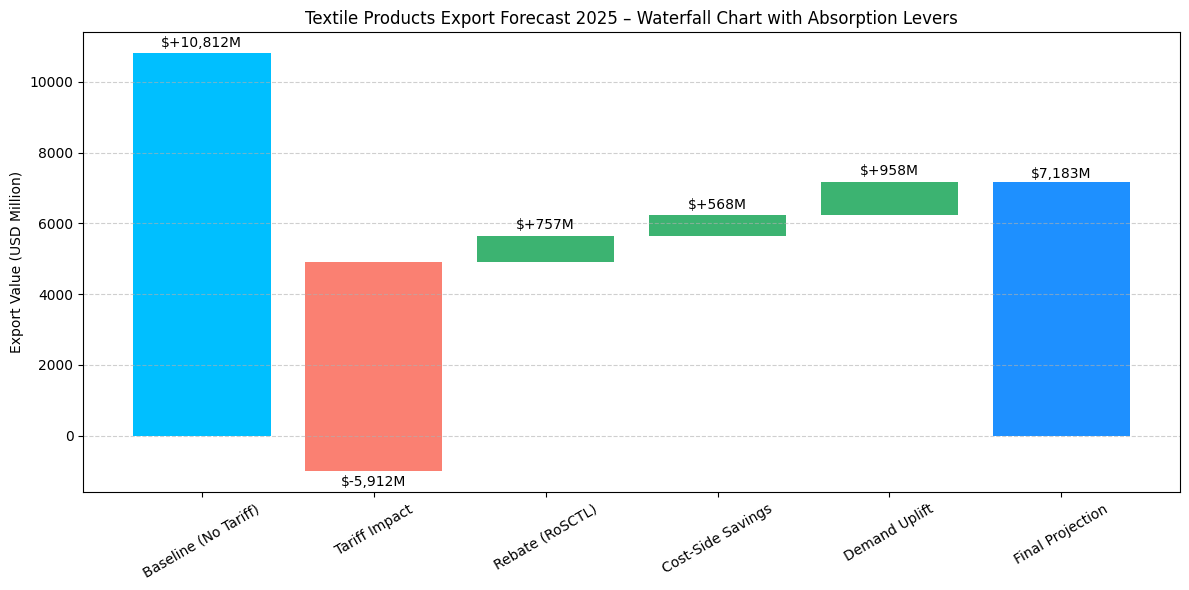

In [24]:
# Fix the IndexError: Make sure cumulative list matches values length

import matplotlib.pyplot as plt

# Example values for Base Case scenario for Textile Products
baseline_2025 = 10812.18     # No tariff
tariff_only = 4900.00        # Tariff-only impact
rebate_gain = 756.85         # RoSCTL ~7%
cost_savings_gain = 567.86   # Cost side reduction passed to buyer
demand_uplift_gain = 958.31  # Loyalty, bundling, etc.
final_projection = tariff_only + rebate_gain + cost_savings_gain + demand_uplift_gain

# Labels and values
labels = [
    "Baseline (No Tariff)",
    "Tariff Impact",
    "Rebate (RoSCTL)",
    "Cost-Side Savings",
    "Demand Uplift",
    "Final Projection"
]

values = [
    baseline_2025,
    -(baseline_2025 - tariff_only),  # Tariff loss
    rebate_gain,
    cost_savings_gain,
    demand_uplift_gain
]

# Calculate cumulative values
cumulative = [baseline_2025]
for val in values[1:]:
    cumulative.append(cumulative[-1] + val)

# Append final projection to values
values.append(0)  # for plotting height, not needed since final is in cumulative

# Colors
colors = ['deepskyblue', 'salmon', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'dodgerblue']

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(len(cumulative)):
    bottom = cumulative[i] if i > 0 and values[i] < 0 else cumulative[i] - values[i]
    ax.bar(labels[i], values[i], bottom=bottom, color=colors[i])
    ax.text(i, bottom + values[i] + (100 if values[i] > 0 else -100),
            f"${values[i]:+,.0f}M", ha='center', va='bottom' if values[i] > 0 else 'top')

# Final bar (solid)
ax.bar(labels[-1], cumulative[-1], color=colors[-1])
ax.text(len(labels)-1, cumulative[-1] + 100, f"${cumulative[-1]:,.0f}M", ha='center')

ax.set_title("Textile Products Export Forecast 2025 – Waterfall Chart with Absorption Levers")
ax.set_ylabel("Export Value (USD Million)")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()




**Insight:** With the absorption parameters used in this model, the businesses (here, textile) seems to reduce but the extent has been lowered by some marketing tactics and better execution of operations. Applying the quantified levers, the model recovers $2.3B of that loss, absorbing ~39% of the shock and landing at $7.18B (i.e., 66.4% of the baseline).
 